<a href="https://colab.research.google.com/github/AFBA1993/Projects/blob/main/Insights/IfoodCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import seaborn as sns
import warnings
from dython.nominal import associations
warnings.filterwarnings('ignore')
%matplotlib inline

# **Loading data:**

In [220]:
url = ('https://raw.githubusercontent.com/ifood/'
        +'ifood-data-business-analyst-test/master/ml_project1_data.csv')

url_data = requests.get(url).content
raw_data = pd.read_csv(io.StringIO(url_data.decode('utf-8')))

# **Preprocessing Data:**

In [221]:
raw_data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Checking and treating missing values:

In [222]:
raw_data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are only 24 missing values within the Income feature.

In [223]:
mean_income = raw_data.Income.loc[(raw_data.Income)!= 'NaN'].mean()
mean_income

52247.25135379061

In [224]:
raw_data.Income.fillna(mean_income, inplace = True)

In [225]:
raw_data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# Verifying if every row correspond to an unique user:

In [226]:
len(raw_data)

2240

In [227]:
raw_data.ID.nunique()

2240

Every row is unique.

# Classifying features into numerical and categorical:

In [228]:
raw_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Just creating an Age feature from year of birth:

In [229]:
data = raw_data

In [230]:
data['Age'] = 2022 - data.Year_Birth
data.drop(['Year_Birth'], axis = 1,  inplace = True)

Returning to the classification process:

In [231]:
categorical_data = raw_data[['Education', 'Marital_Status', 'AcceptedCmp1',
                           'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                           'AcceptedCmp5', 'Response', 'Complain']]

In [232]:
numerical_data = raw_data[[ 'Age', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                           'MntWines','MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts',
                           'MntGoldProds', 'NumDealsPurchases', 
                           'NumWebPurchases', 'NumCatalogPurchases',
                           'NumStorePurchases', 'NumWebVisitsMonth',
                           'Z_CostContact', 'Z_Revenue']]

# Statistical information and outliers detection:

In [233]:
numerical_data.describe()

,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0
mean,53.194196,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0
std,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0
min,26.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,45.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0
50%,52.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0
75%,63.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0
max,129.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0


Strange facts:
- Age: max 129 years
- Income: 666666.
- Mnt of wines: 1493.
- Mnt of meat products: 1725. 

For each feature, the IQR method is going to detect outliers' presence:

In [234]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    
    lowerBound=Q1-1.5*IQR
    upperBound=Q1+1.5*IQR
    
    ls=df.index[(df[ft]<lowerBound)|(df[ft]>upperBound)]
    
    return ls

In [235]:
index_outliers = []
for feature in numerical_data.columns:
  index_outliers.extend(outliers(numerical_data, feature))

index_outliers=sorted(index_outliers)
index_outliers=set(index_outliers)
index_outliers=list(index_outliers)

In [236]:
len(index_outliers)/len(data)*100

54.776785714285715

A figure of 54.8% of the data corresponds to outliers, such information should be corroborated and validated from the source. However, in this case they will be kept since they contain essential information for analyses.

In [237]:
outliers_data = data.iloc[index_outliers]
outliers_data.tail(3)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
2041,4974,Graduation,Single,83273.0,1,2,2012-09-25,98,433,89,...,0,0,0,0,0,0,3,11,0,52
2044,4095,Graduation,Married,37150.0,1,0,2012-09-11,80,167,37,...,0,0,0,0,0,0,3,11,0,51
2047,10701,Graduation,Married,65308.0,0,0,2013-09-11,60,713,0,...,0,0,1,1,0,0,3,11,0,49


A data frame named as 'outliers_data' reports the outliliers within the database.

# Analyzing variance to find non useful features:

In [238]:
numerical_data.var()

Age                    1.436179e+02
Income                 6.268913e+08
Kidhome                2.898725e-01
Teenhome               2.965219e-01
Recency                8.388237e+02
MntWines               1.132978e+05
MntFruits              1.581926e+03
MntMeatProducts        5.094743e+04
MntFishProducts        2.984325e+03
MntSweetProducts       1.704080e+03
MntGoldProds           2.721442e+03
NumDealsPurchases      3.733542e+00
NumWebPurchases        7.721252e+00
NumCatalogPurchases    8.544517e+00
NumStorePurchases      1.056873e+01
NumWebVisitsMonth      5.888606e+00
Z_CostContact          0.000000e+00
Z_Revenue              0.000000e+00
dtype: float64

The variance of features 'Z_CostContact' and 'Z_Reveneu' is zero, thus, those variables do not have any statistical importance.

In [239]:
data.drop(['Z_CostContact', 'Z_Revenue'], axis = 1, inplace = True)

In [240]:
numerical_data.drop(['Z_CostContact', 'Z_Revenue'], axis = 1, inplace = True)

# Understanding numerical variables:

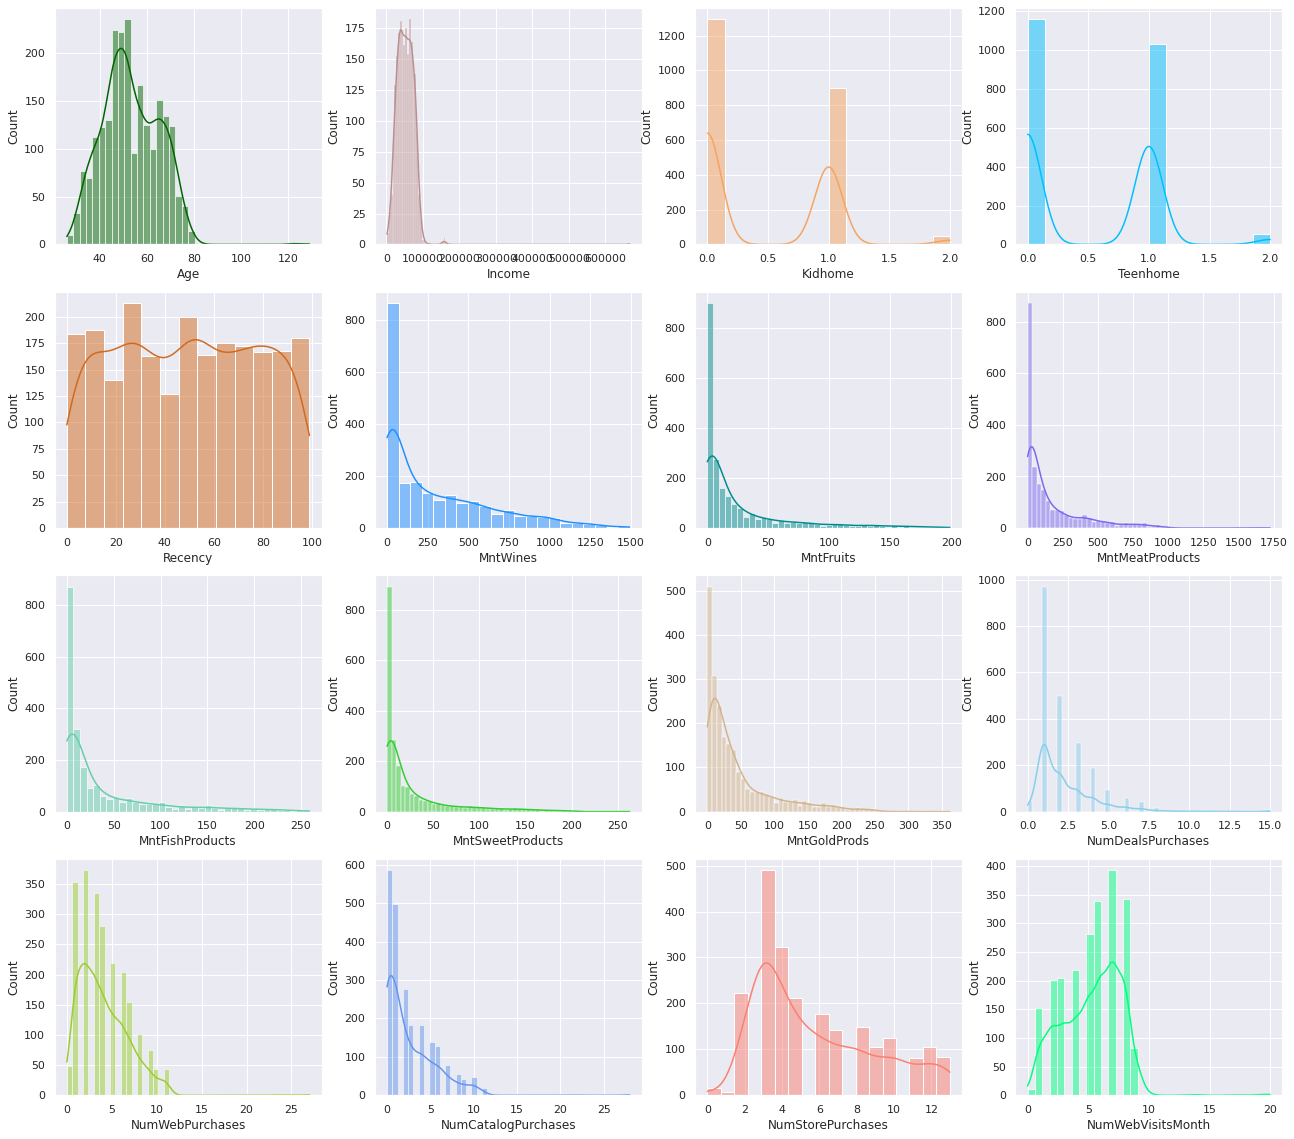

In [241]:
sns.set(style = 'darkgrid')
NUM_COLUMNS = 4
NUM_ROWS = 4
feature_index = 0
COLORS = ['darkgreen', 'rosybrown', 'sandybrown', 'deepskyblue',
          'chocolate', 'dodgerblue', 'darkcyan', 'mediumslateblue',
          'mediumaquamarine', 'limegreen', 'tan', 'skyblue',
          'yellowgreen', 'cornflowerblue', 'salmon', 'springgreen']


fig, axs = plt.subplots(NUM_ROWS, NUM_COLUMNS, figsize=(22, 20))
for j in range(NUM_ROWS):
  for i in range(NUM_COLUMNS):
    sns.histplot(data = numerical_data, 
                 x = numerical_data.columns[feature_index], 
                 kde = True, color = COLORS[feature_index], 
                 ax=axs[j, i])
    feature_index +=1
plt.show()

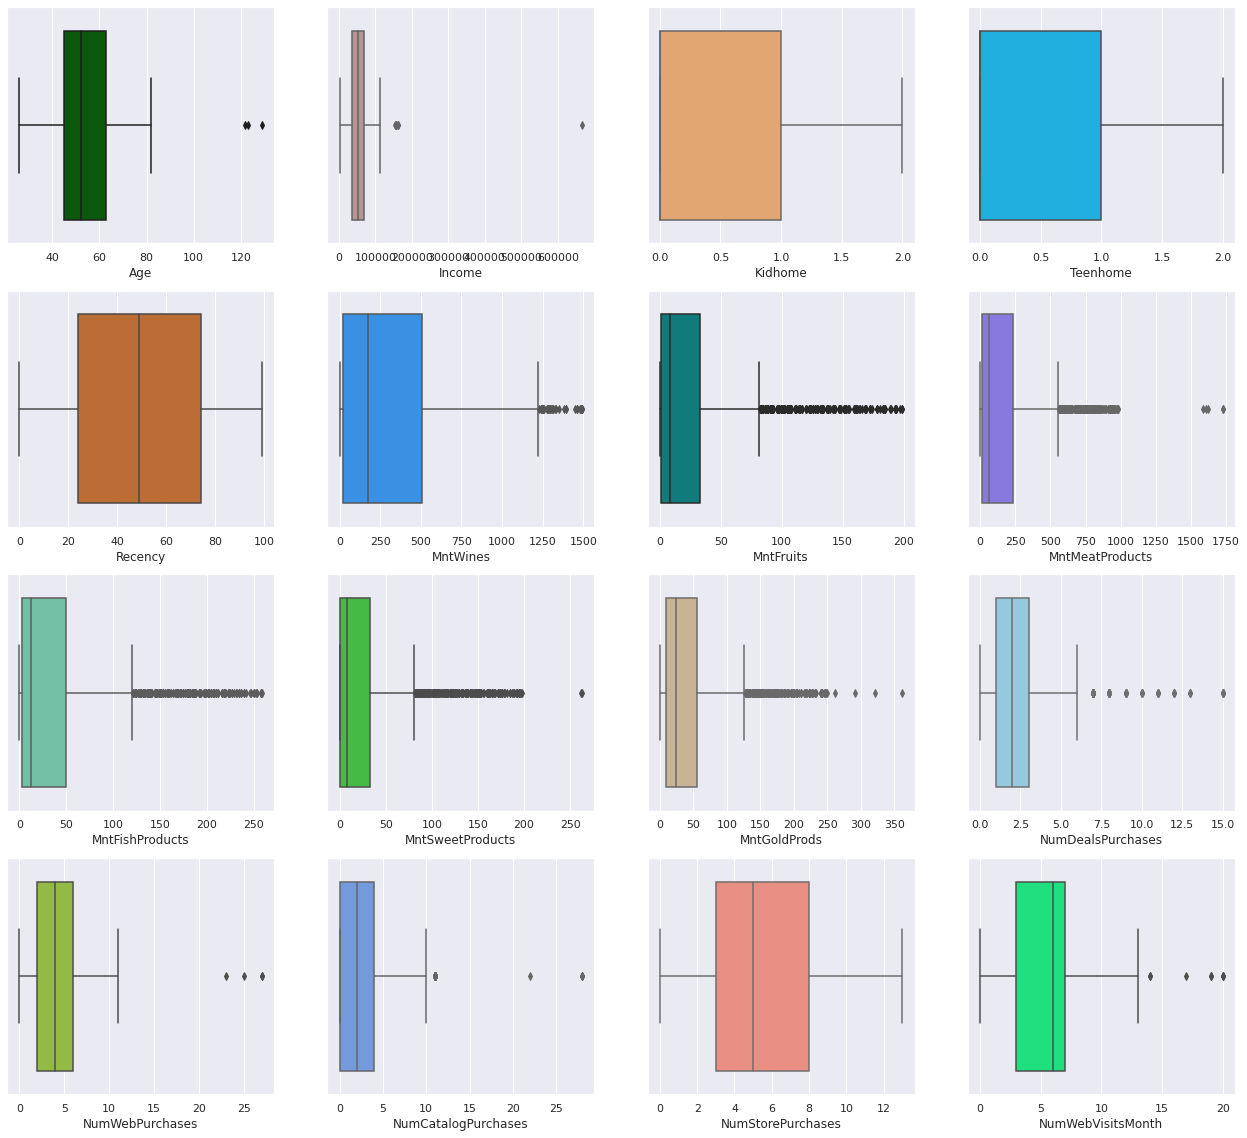

In [242]:
sns.set_theme(style = 'darkgrid')
NUM_COLUMNS = 4
NUM_ROWS = 4
feature_index = 0
COLORS = ['darkgreen', 'rosybrown', 'sandybrown', 'deepskyblue',
          'chocolate', 'dodgerblue', 'darkcyan', 'mediumslateblue',
          'mediumaquamarine', 'limegreen', 'tan', 'skyblue',
          'yellowgreen', 'cornflowerblue', 'salmon', 'springgreen']


fig, axs = plt.subplots(NUM_ROWS, NUM_COLUMNS, figsize=(22, 20))
for j in range(NUM_ROWS):
  for i in range(NUM_COLUMNS):
    sns.boxplot(data = numerical_data, 
                 x = numerical_data.columns[feature_index], 
                 color = COLORS[feature_index], 
                 ax=axs[j, i])
    feature_index +=1
plt.show()

In [243]:
mean_age = data.loc[(data.Age) < 95].Age.mean()
data.Age.loc[(data.Age) > 95] = mean_age

In [244]:
numerical_data.Age.loc[(numerical_data.Age) > 95] = mean_age

# Pearson correlation to avoid linearity in numerical features:

<AxesSubplot:>

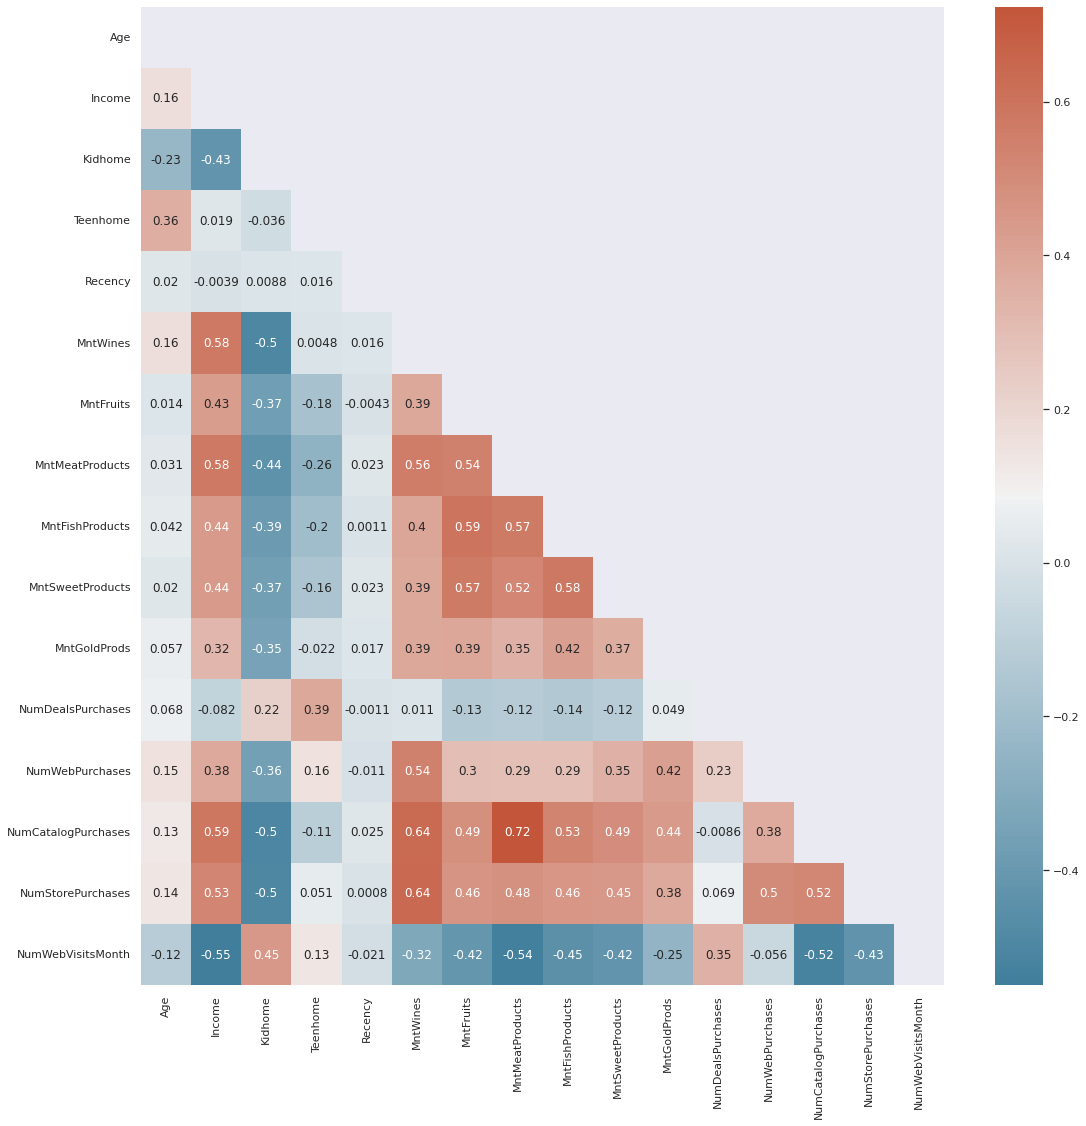

In [245]:
f, ax = plt.subplots(figsize=(18, 18))
mask = np.triu(np.ones_like(numerical_data.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(numerical_data.corr(), annot=True, mask = mask, cmap=cmap)

The numerical features do not present linearity.

# Associations between categorical variables:

In [246]:
categorical_data.columns

Index(['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'],
      dtype='object')

In [247]:
categorical_data.Complain.unique()

array([0, 1])

Preparing data to be analyzed by the dython library:

In [248]:
categorical_data['AcceptedCmp1'] = categorical_data['AcceptedCmp1']\
                                  .apply(lambda x: 'Yes' if x == 1 else 'No')
categorical_data['AcceptedCmp2'] = categorical_data['AcceptedCmp2']\
                                  .apply(lambda x: 'Yes' if x == 1 else 'No')
categorical_data['AcceptedCmp3'] = categorical_data['AcceptedCmp3']\
                                  .apply(lambda x: 'Yes' if x == 1 else 'No')
categorical_data['AcceptedCmp4'] = categorical_data['AcceptedCmp4']\
                                  .apply(lambda x: 'Yes' if x == 1 else 'No')
categorical_data['AcceptedCmp5'] = categorical_data['AcceptedCmp5']\
                                  .apply(lambda x: 'Yes' if x == 1 else 'No')
categorical_data['Response'] = categorical_data['Response']\
                                  .apply(lambda x: 'Yes' if x == 1 else 'No')
categorical_data['Complain'] = categorical_data['Complain']\
                                  .apply(lambda x: 'Yes' if x == 1 else 'No')

In [249]:
categorical_data.head(3)

,Education,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,Graduation,Single,No,No,No,No,No,Yes,No
1,Graduation,Single,No,No,No,No,No,No,No
2,Graduation,Together,No,No,No,No,No,No,No


Using Cramer's V to measure the association between categorical variables (returns a range between 0-1 and it is symmetrycal):

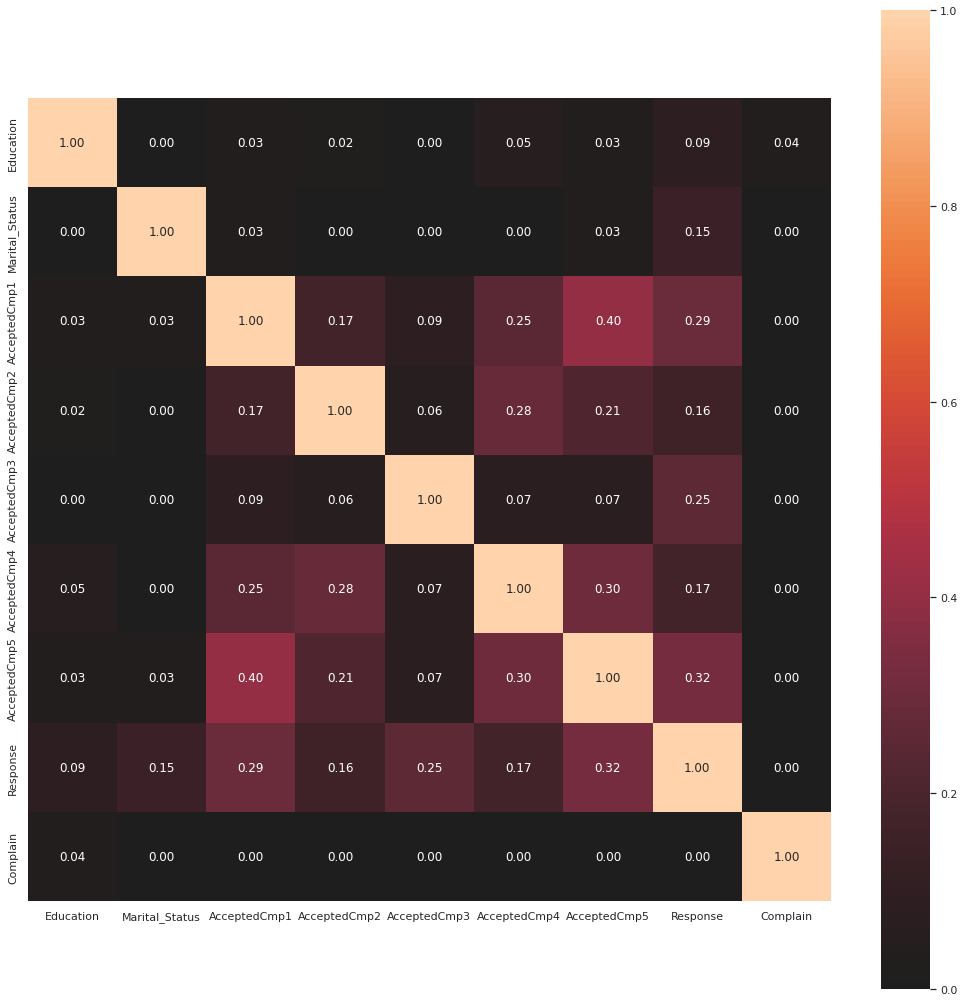

{'ax': <AxesSubplot:>,
 'corr':                 Education  Marital_Status  AcceptedCmp1  AcceptedCmp2  \
 Education        1.000000        0.000000      0.034624      0.017212   
 Marital_Status   0.000000        1.000000      0.030866      0.000000   
 AcceptedCmp1     0.034624        0.030866      1.000000      0.166095   
 AcceptedCmp2     0.017212        0.000000      0.166095      1.000000   
 AcceptedCmp3     0.000000        0.000000      0.088786      0.061000   
 AcceptedCmp4     0.047713        0.000000      0.246988      0.284095   
 AcceptedCmp5     0.033795        0.026690      0.399104      0.213059   
 Response         0.092299        0.145252      0.290724      0.162509   
 Complain         0.038958        0.000000      0.000000      0.000000   
 
                 AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Response  Complain  
 Education           0.000000      0.047713      0.033795  0.092299  0.038958  
 Marital_Status      0.000000      0.000000      0.026690  0.145252

In [250]:
associations(categorical_data, nominal_columns = 'all', 
             nom_nom_assoc = 'cramer', figsize = (18, 18))

The associations between categorical data are low, which means that features are independent.

# Correlations and associations between numerical and categorical features:

In [251]:
merged_data = pd.concat([numerical_data, categorical_data], axis = 1)
merged_data.head(3)

,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,Education,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,65.0,58138.0,0,0,58,635,88,546,172,88,...,7,Graduation,Single,No,No,No,No,No,Yes,No
1,68.0,46344.0,1,1,38,11,1,6,2,1,...,5,Graduation,Single,No,No,No,No,No,No,No
2,57.0,71613.0,0,0,26,426,49,127,111,21,...,4,Graduation,Together,No,No,No,No,No,No,No


In [252]:
merged_data.columns

Index(['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'],
      dtype='object')

In [253]:
NOM_COL = list(range(0, 16))
CAT_COL = list(range(16, 25))

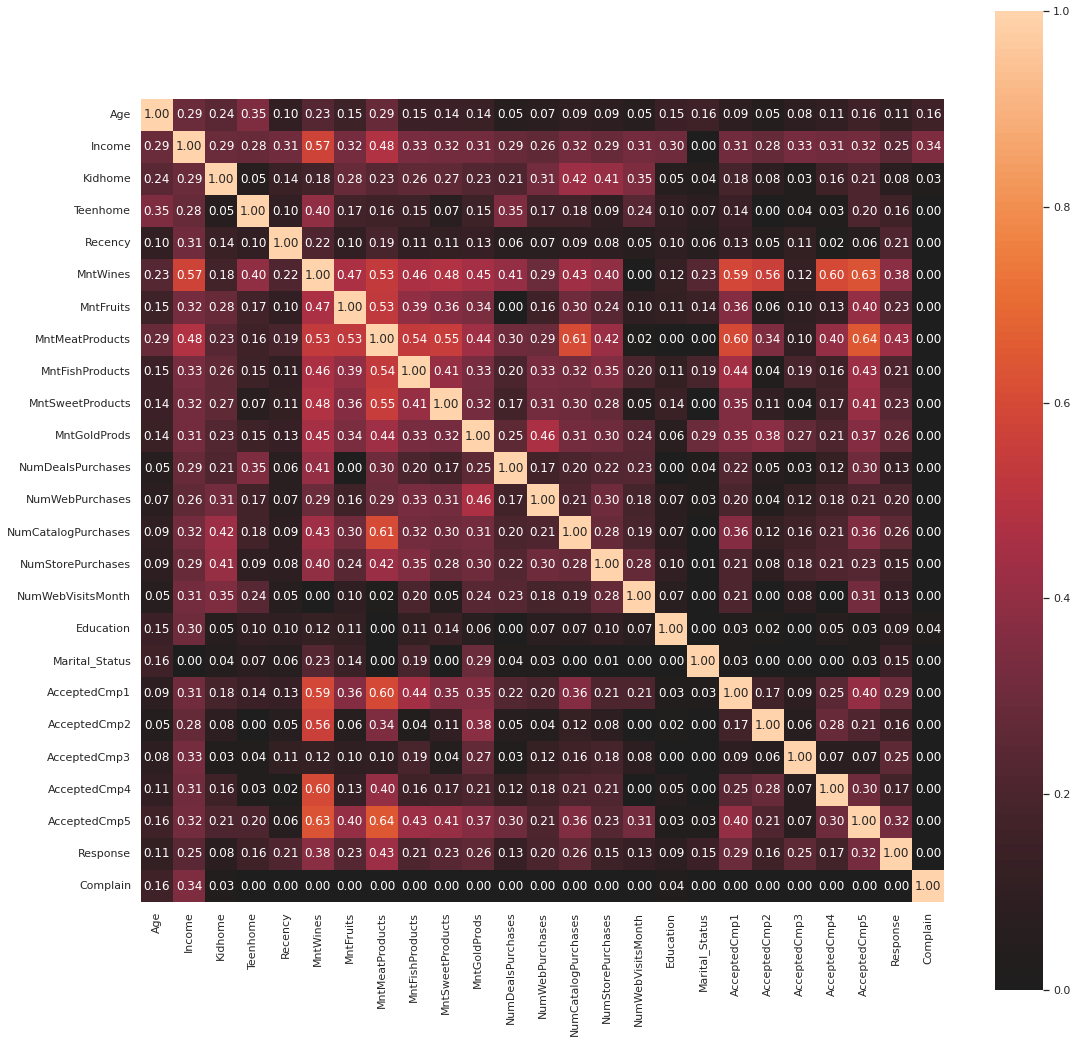

{'ax': <AxesSubplot:>,
 'corr':                           Age    Income   Kidhome  Teenhome   Recency  \
 Age                  1.000000  0.290913  0.243259  0.349815  0.104321   
 Income               0.290913  1.000000  0.292257  0.282143  0.309121   
 Kidhome              0.243259  0.292257  1.000000  0.054081  0.135966   
 Teenhome             0.349815  0.282143  0.054081  1.000000  0.102499   
 Recency              0.104321  0.309121  0.135966  0.102499  1.000000   
 MntWines             0.229309  0.571464  0.179548  0.395124  0.216658   
 MntFruits            0.150647  0.323991  0.284357  0.165242  0.104102   
 MntMeatProducts      0.288425  0.476796  0.234974  0.162349  0.188472   
 MntFishProducts      0.146063  0.328728  0.257996  0.154051  0.106489   
 MntSweetProducts     0.143988  0.319885  0.265041  0.067881  0.110333   
 MntGoldProds         0.138763  0.314633  0.225062  0.149590  0.126013   
 NumDealsPurchases    0.052801  0.285354  0.213730  0.350117  0.064415   
 NumWeb

In [254]:
associations(merged_data, nominal_columns = NOM_COL, 
             numerical_columns = CAT_COL,
             nom_nom_assoc = 'cramer', num_num_assoc = 'pearson',
             nom_num_assoc='correlation_ratio',
             figsize = (18, 18))

There are still low correlation ration between numerical and categorical features, not higher than 0.9. Consequently, the features are highly independent (orthogonal).

# **Exploring and analyzing data:**

In [255]:
products = merged_data[['MntWines', 'MntFruits', 'MntMeatProducts',
                                     'MntFishProducts', 'MntSweetProducts',
                                     'MntGoldProds']].copy()

In [256]:
products_total = products.sum(axis = 0)
products_total_per = products_total.div(products_total.
                                           sum(axis=0))

In [257]:
products_total.sum()

1356988

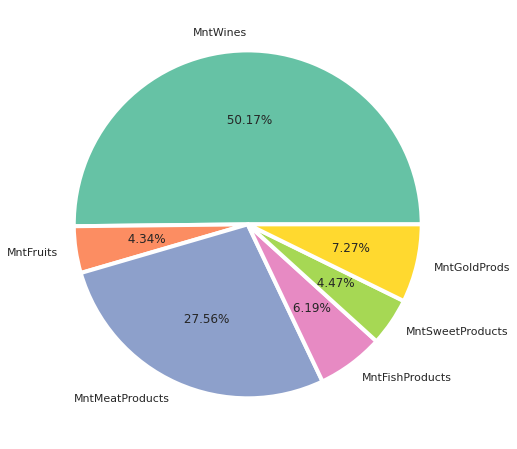

In [258]:
COLORS = sns.color_palette('Set2')[0:9]
fig, axs = plt.subplots(figsize=(8, 8))
wedgeprops = {"linewidth": 4, 'width':1, "edgecolor":"white"}
plt.pie(products_total_per, labels = products_total_per.index, colors = COLORS,
                                   wedgeprops = wedgeprops, autopct =' %.2f%%')

plt.show()

In [259]:
df_education_products = merged_data[['Education', 'MntWines', 
                                     'MntFruits', 'MntMeatProducts',
                                     'MntFishProducts', 'MntSweetProducts',
                                     'MntGoldProds']].copy()

In [260]:
df_education_products = df_education_products.groupby('Education', \
                        as_index = True). agg({'MntWines': 'sum',
                                                'MntFruits': 'sum',
                                                'MntMeatProducts': 'sum',
                                                'MntFishProducts': 'sum',
                                                'MntSweetProducts': 'sum',
                                                'MntGoldProds': 'sum'})

In [261]:
df_education_products

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
2n Cycle,40231,5878,28675,9639,6953,9419
Basic,391,600,618,921,654,1233
Graduation,320371,34683,202284,48630,35351,57307
Master,123238,8012,60450,11877,7835,14947
PhD,196585,9744,81941,12990,9828,15703


In [262]:
df_education_products_per = (df_education_products.div(df_education_products.
                                 sum(axis=0), axis = 1).multiply(100))

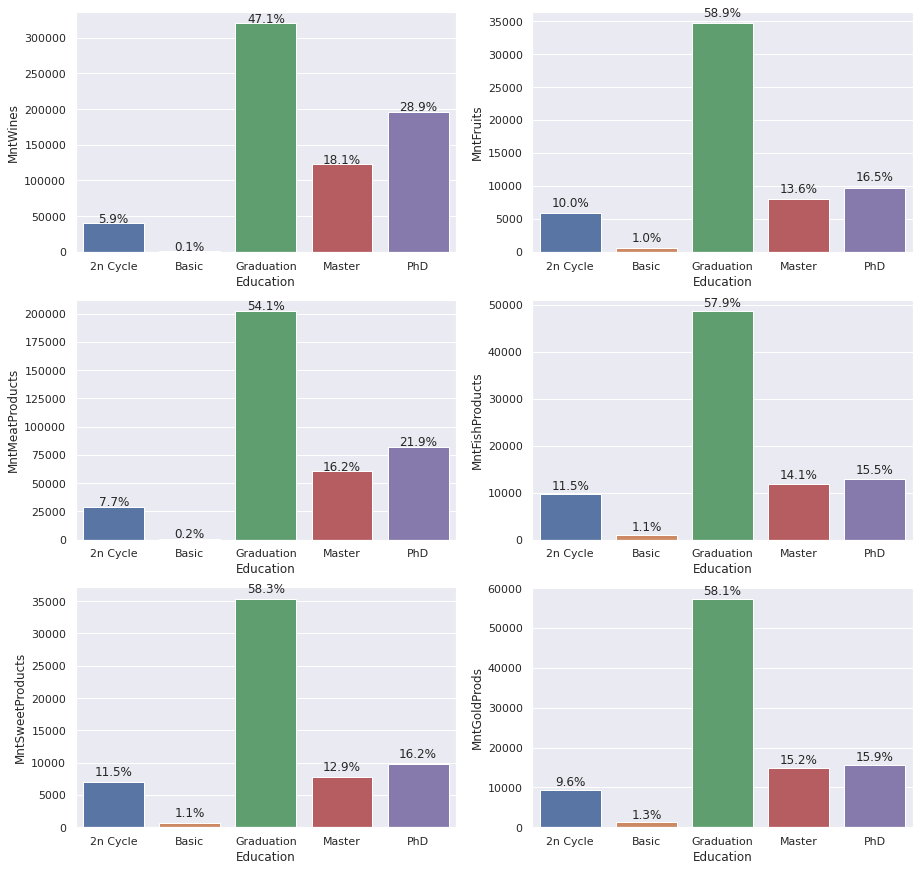

In [263]:
sns.set_theme(style = 'darkgrid')
NUM_COLUMNS = 2
NUM_ROWS = 3
feature_index = 0

fig, axs = plt.subplots(NUM_ROWS, NUM_COLUMNS, figsize=(15, 15))
for j in range(NUM_ROWS):
  for i in range(NUM_COLUMNS):
    feature = df_education_products_per.columns[feature_index]
    percents = df_education_products_per[feature][:].values
    sns.set_style("darkgrid")
    p = sns.barplot(x = df_education_products.index, 
                y = df_education_products[feature],
                data = df_education_products, ax=axs[j, i])
    patches = p.patches
    for k in range(len(patches)):
      x = patches[k].get_x() + patches[k].get_width()/2
      y = patches[k].get_height()+1000
      p.annotate('{:.1f}%'.format(percents[k]), (x, y), ha='center')
    feature_index +=1
plt.show()

In [264]:
merged_data.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)